In [1]:
import sys
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
import scipy
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
movie_reviews_data_folder = os.path.join('data', 'txt_sentoken')
dataset = load_files(movie_reviews_data_folder, shuffle=True)
docs_train, docs_test, y_train, y_test = train_test_split(
        dataset.data, dataset.target, test_size=0.2, random_state=None)

In [3]:
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=3)
X_train_counts = vectorizer.fit_transform(docs_train)
X_test_counts = vectorizer.transform(docs_test)
print(X_train_counts.shape)

(1600, 16390)


In [4]:
# start off with a small training set T of 100 data points.
# T' is the remaining training data
T = X_train_counts[:100]
y_T = y_train[:100]
T_prime = X_train_counts[100:]
y_T_prime = y_train[100:]

In [5]:
# Random Sampling
size_to_error_RS = dict()
#size_to_train_error = dict()

while T_prime.shape[0] > 0:
    size = T.shape[0]
    if size % 100 == 0:
        print(size)
        
    # train a SVM on T
    clf = LinearSVC(C=1000)
    clf.fit(T, y_T)
    
    # evaluate the training performance
    #y_train_pred = clf.predict(T_prime)
    #train_error = np.mean(y_train_pred != y_T_prime)
    #size_to_train_error[size] = train_error
    
    # evaluate the test performance
    y_pred = clf.predict(X_test_counts)
    error = np.mean(y_pred != y_test)
    size_to_error_RS[size] = error
    
    # select k training examples with the lowest confidence scores
    K = 10
    indices = list(range(T_prime.shape[0]))
    random.shuffle(indices)
    indices = indices[:K]
    
    # add k examples to the training set
    m = T_prime[indices]
    n = y_T_prime[indices]
    T = scipy.sparse.vstack((T, m))
    y_T = np.concatenate((y_T, n))
    
    # remove the k examples from T'
    mask = np.ones(T_prime.shape[0], dtype=bool)
    mask[indices] = False
    T_prime = T_prime[mask]
    y_T_prime = y_T_prime[mask]



100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500


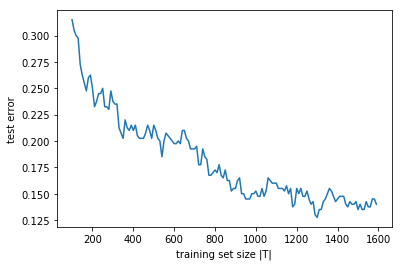

final test error: 0.14


In [6]:
keys = sorted(size_to_error_RS.keys())
values = [size_to_error_RS[key] for key in keys] 
plt.figure()
plt.xlabel("training set size |T|")
plt.ylabel("test error")
plt.plot(keys, values)
plt.show()
print('final test error: ' + str(values[-1]))

In [7]:
# start off with a small training set T of 100 data points.
# T' is the remaining training data
T = X_train_counts[:100]
y_T = y_train[:100]
T_prime = X_train_counts[100:]
y_T_prime = y_train[100:]

In [8]:
# Uncertainty Sampling
size_to_error_US = dict()
#size_to_train_error = dict()

while T_prime.shape[0] > 0:
    size = T.shape[0]
    if size % 100 == 0:
        print(size)
        
    # train a SVM on T
    clf = LinearSVC(C=1000)
    clf.fit(T, y_T)
    
    # evaluate the training performance
    #y_train_pred = clf.predict(T_prime)
    #train_error = np.mean(y_train_pred != y_T_prime)
    #size_to_train_error[size] = train_error
    
    # evaluate the test performance
    y_pred = clf.predict(X_test_counts)
    error = np.mean(y_pred != y_test)
    size_to_error_US[size] = error
    
    # select k training examples with the lowest confidence scores
    K = 10
    score = clf.decision_function(T_prime)
    score = np.absolute(score)
    indices = np.argsort(score)[:10]
    
    # add k examples to the training set
    m = T_prime[indices]
    n = y_T_prime[indices]
    T = scipy.sparse.vstack((T, m))
    y_T = np.concatenate((y_T, n))
    
    # remove the k examples from T'
    mask = np.ones(T_prime.shape[0], dtype=bool)
    mask[indices] = False
    T_prime = T_prime[mask]
    y_T_prime = y_T_prime[mask]



100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500


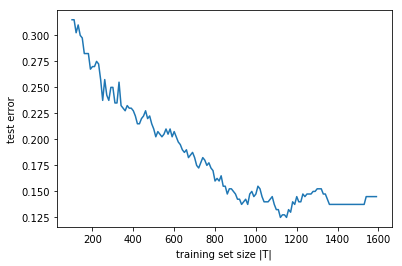

final test error: 0.145


In [9]:
keys = sorted(size_to_error_US.keys())
values = [size_to_error_US[key] for key in keys] 
plt.figure()
plt.xlabel("training set size |T|")
plt.ylabel("test error")
plt.plot(keys, values)
plt.show()
print('final test error: ' + str(values[-1]))

In [ ]:
# start off with a small training set T of 100 data points.
# T' is the remaining training data
T = X_train_counts[:100]
y_T = y_train[:100]
T_prime = X_train_counts[100:]
y_T_prime = y_train[100:]

In [ ]:
# Query by Committee

size_to_error_QBC = dict()
#size_to_error_knn = dict()
size_to_error_dt = dict()
size_to_error_svm = dict()
size_to_error_nb = dict()

while T_prime.shape[0] > 0:
    size = T.shape[0]
    if size % 100 == 0:
        print(size)
        
    # train 3 classifiers: knn, decision trees, naive bayes on T
    #knn = KNeighborsClassifier()
    dt = DecisionTreeClassifier()
    svm = LinearSVC(C=1000)
    nb = MultinomialNB()
    
    #knn.fit(T, y_T)
    dt.fit(T, y_T)
    svm.fit(T, y_T)
    nb.fit(T, y_T)
    
    # evaluate the test performance
    #y_pred_knn = knn.predict(X_test_counts)
    y_pred_dt = dt.predict(X_test_counts)
    y_pred_svm = svm.predict(X_test_counts)
    y_pred_nb = nb.predict(X_test_counts)
    #y_pred = np.round((y_pred_knn + y_pred_dt + y_pred_nb) / 3.0)
    #y_pred = np.round((y_pred_knn + y_pred_svm + y_pred_nb) / 3.0)
    y_pred = np.round((y_pred_dt + y_pred_svm + y_pred_nb) / 3.0)
    error = np.mean(y_pred != y_test)
    #error_knn = np.mean(y_pred_knn != y_test)
    error_dt = np.mean(y_pred_dt != y_test)
    error_svm = np.mean(y_pred_svm != y_test)
    error_nb = np.mean(y_pred_nb != y_test)
    size_to_error_QBC[size] = error
    #size_to_error_knn[size] = error_knn
    size_to_error_dt[size] = error_dt
    size_to_error_svm[size] = error_svm
    size_to_error_nb[size] = error_nb
    
    # select k training examples that disagree.
    #y_pred_train_knn = knn.predict(T_prime)
    y_pred_train_dt = dt.predict(T_prime)
    y_pred_train_svm = svm.predict(T_prime)
    y_pred_train_nb = nb.predict(T_prime)
    K = 10
    #d = (y_pred_train_knn != y_pred_train_dt) | (y_pred_train_knn != y_pred_train_nb)
    #d = (y_pred_train_knn != y_pred_train_svm) | (y_pred_train_knn != y_pred_train_nb)
    d = (y_pred_train_dt != y_pred_train_svm) | (y_pred_train_dt != y_pred_train_nb)
    if np.sum(d) >= K:
        indices = list(np.where(d == True)[0])[:K]
    else:
        # if # of disagree examples < 10, randomly select the rest.
        indices_1 = list(np.where(d == True)[0])
        n = K - len(indices_1)
        indices_0 = list(np.where(d == False)[0])
        random.shuffle(indices_0)
        indices = indices_1 + indices_0[:n]
        
    # add k examples to the training set
    m = T_prime[indices]
    n = y_T_prime[indices]
    T = scipy.sparse.vstack((T, m))
    y_T = np.concatenate((y_T, n))
    
    # remove the k examples from T'
    mask = np.ones(T_prime.shape[0], dtype=bool)
    mask[indices] = False
    T_prime = T_prime[mask]
    y_T_prime = y_T_prime[mask]


100
200
300
400
500
600
700
800
900
1000


In [ ]:
keys = sorted(size_to_error_QBC.keys())
values = [size_to_error_QBC[key] for key in keys] 
plt.figure()
plt.xlabel("training set size |T|")
plt.ylabel("test error")
plt.plot(keys, values)
plt.show()
print('final test error: ' + str(values[-1]))